# Project: Toyota Corolla 중고차 가격 예측

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp

## 1. 분석대상 Data 가져오기

In [ ]:
test = pd.read_csv("test.csv")
df = pd.read_csv("train.csv")
vr_description = pd.read_excel("data_description.xls")

In [ ]:
test # 회귀모델 결정 후 검정을 위한 data

In [ ]:
df # 분석 대상 data

In [ ]:
vr_description # 변수들에 대한 description

## 2. EDA(Exploratory Data Analysis) : due date = ~ 10/10
* 1) Price의 샘플들의 분포 및 대표값 확인(평균, 분산, Max, Min, 중앙값)
* 2) Q-Q plot도 그려서 정규분포에 가까운지 확인해볼 것
* 3) Feature들을 숫자값과 카테고리값으로 나눠 각각의 관계 파악
* 4) 상관계수 분석은 해당 과정 수강 후 진행할 것

> 1) 샘플들의 Price 대표값 확인

In [ ]:
p = df['Price']
p.describe()

> 2) 샘플의 Price 분포 확인: 각 샘플들의 Price는 양수인 실수값을 가지므로 대표적인 확률분포 중에서는 카이제곱분포에 가까움. 특히 Q-Q plot으로 나타냈을 때, 정규분포가 아님을 확인할 수 있음

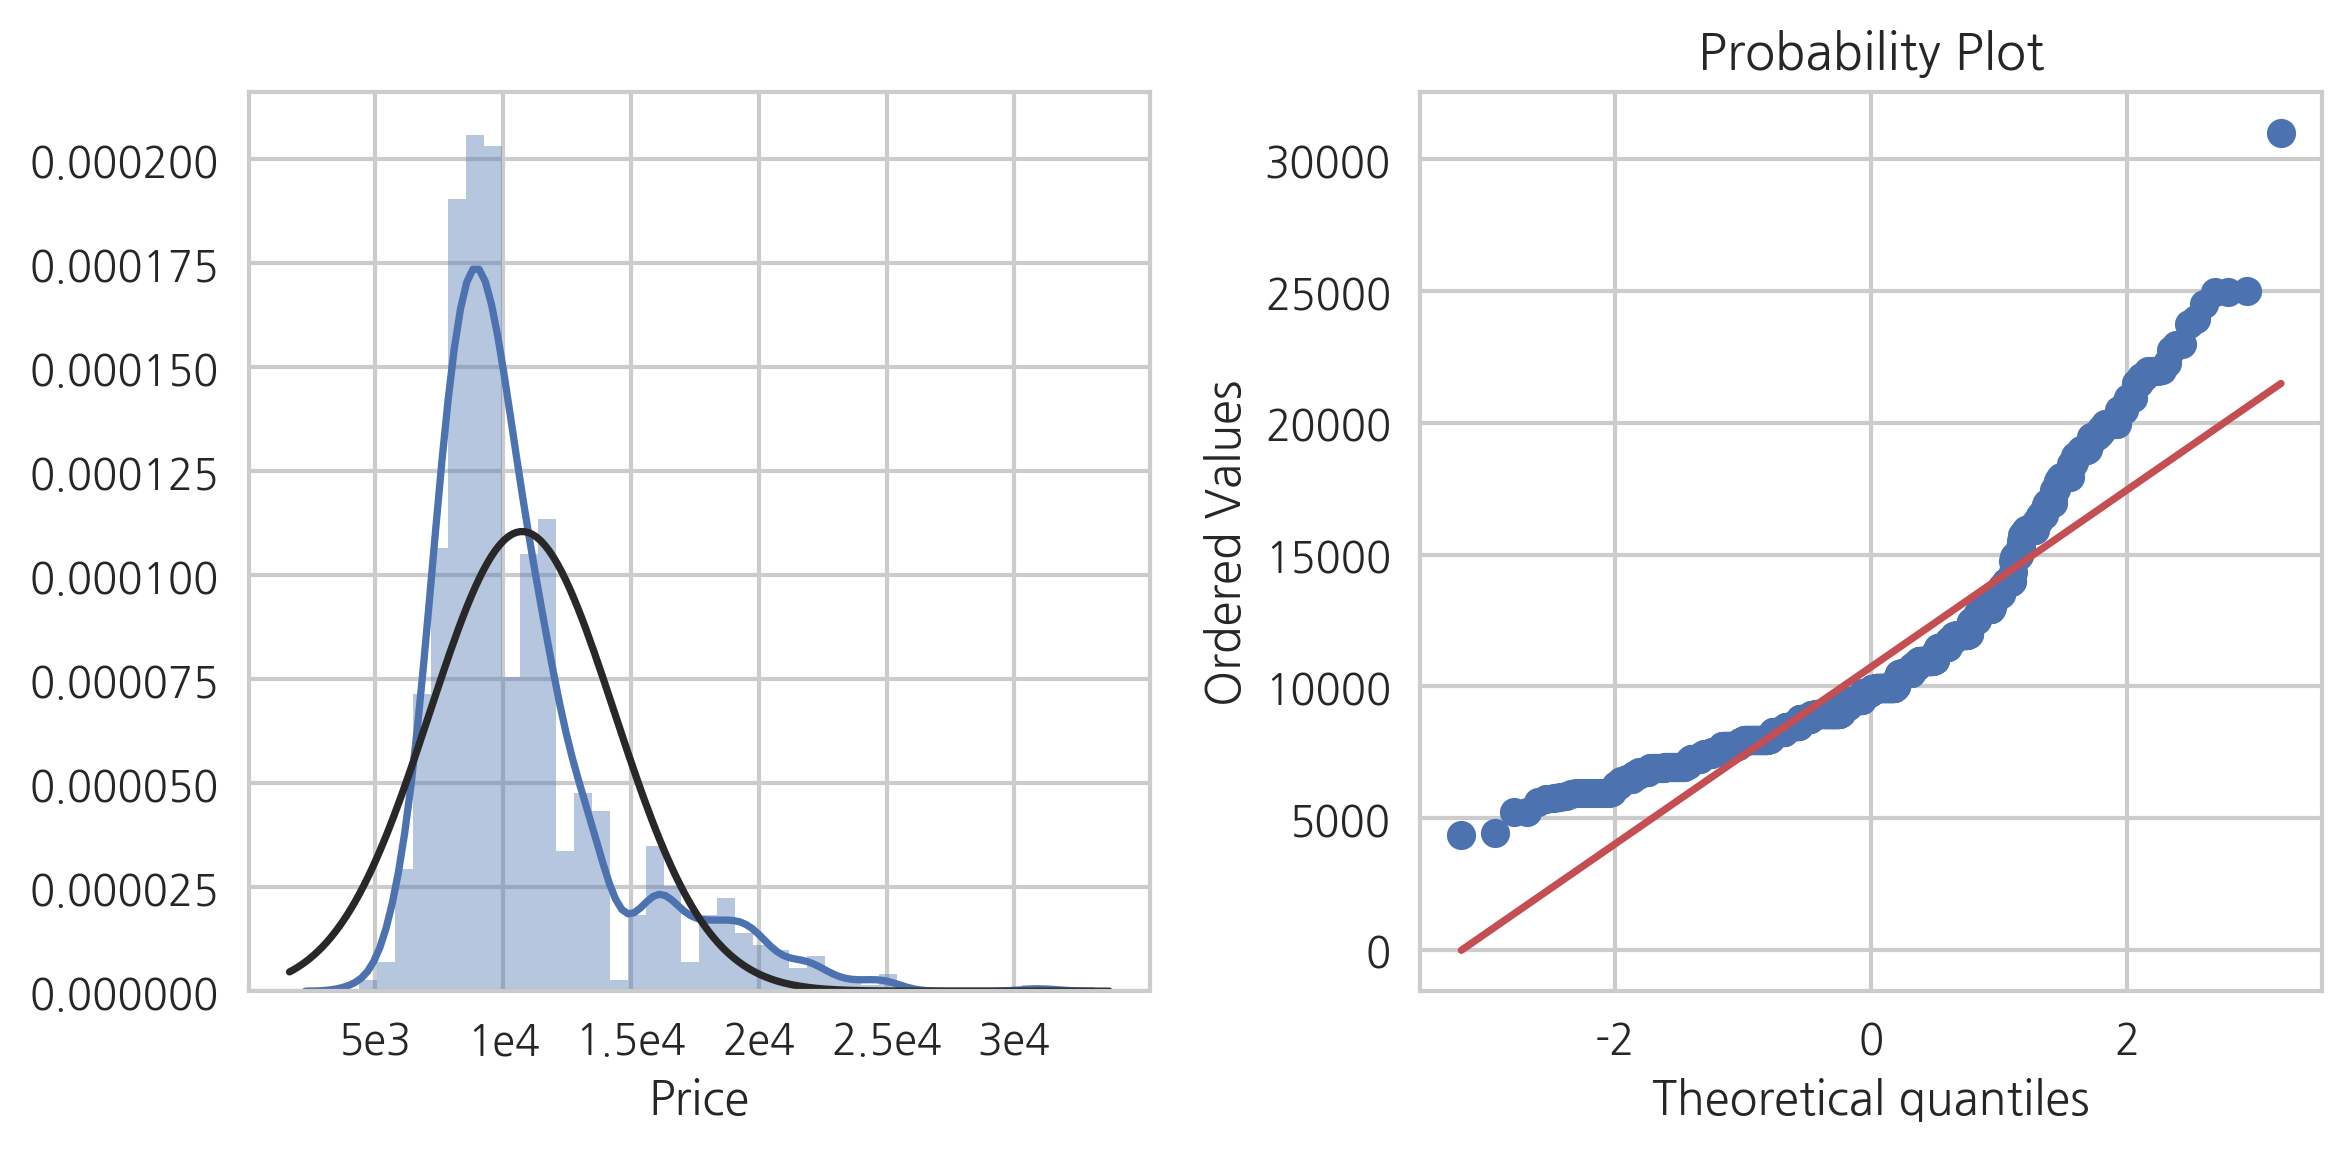

In [14]:
plt.figure(figsize=(8,4))
p_grid = [5e3, 1e4, 1.5e4, 2e4, 2.5e4, 3e4]
p_label = ['5e3', '1e4', '1.5e4', '2e4', '2.5e4', '3e4']
plt.subplot(121); sns.distplot(df.iloc[:,2], fit=sp.stats.norm); plt.xticks(p_grid, p_label)#, bins=30, kde=False)
plt.subplot(122); sp.stats.probplot(df.iloc[:,2], plot=plt)
plt.tight_layout()
plt.show()

> 3) 변수들간의 상관관계 파악

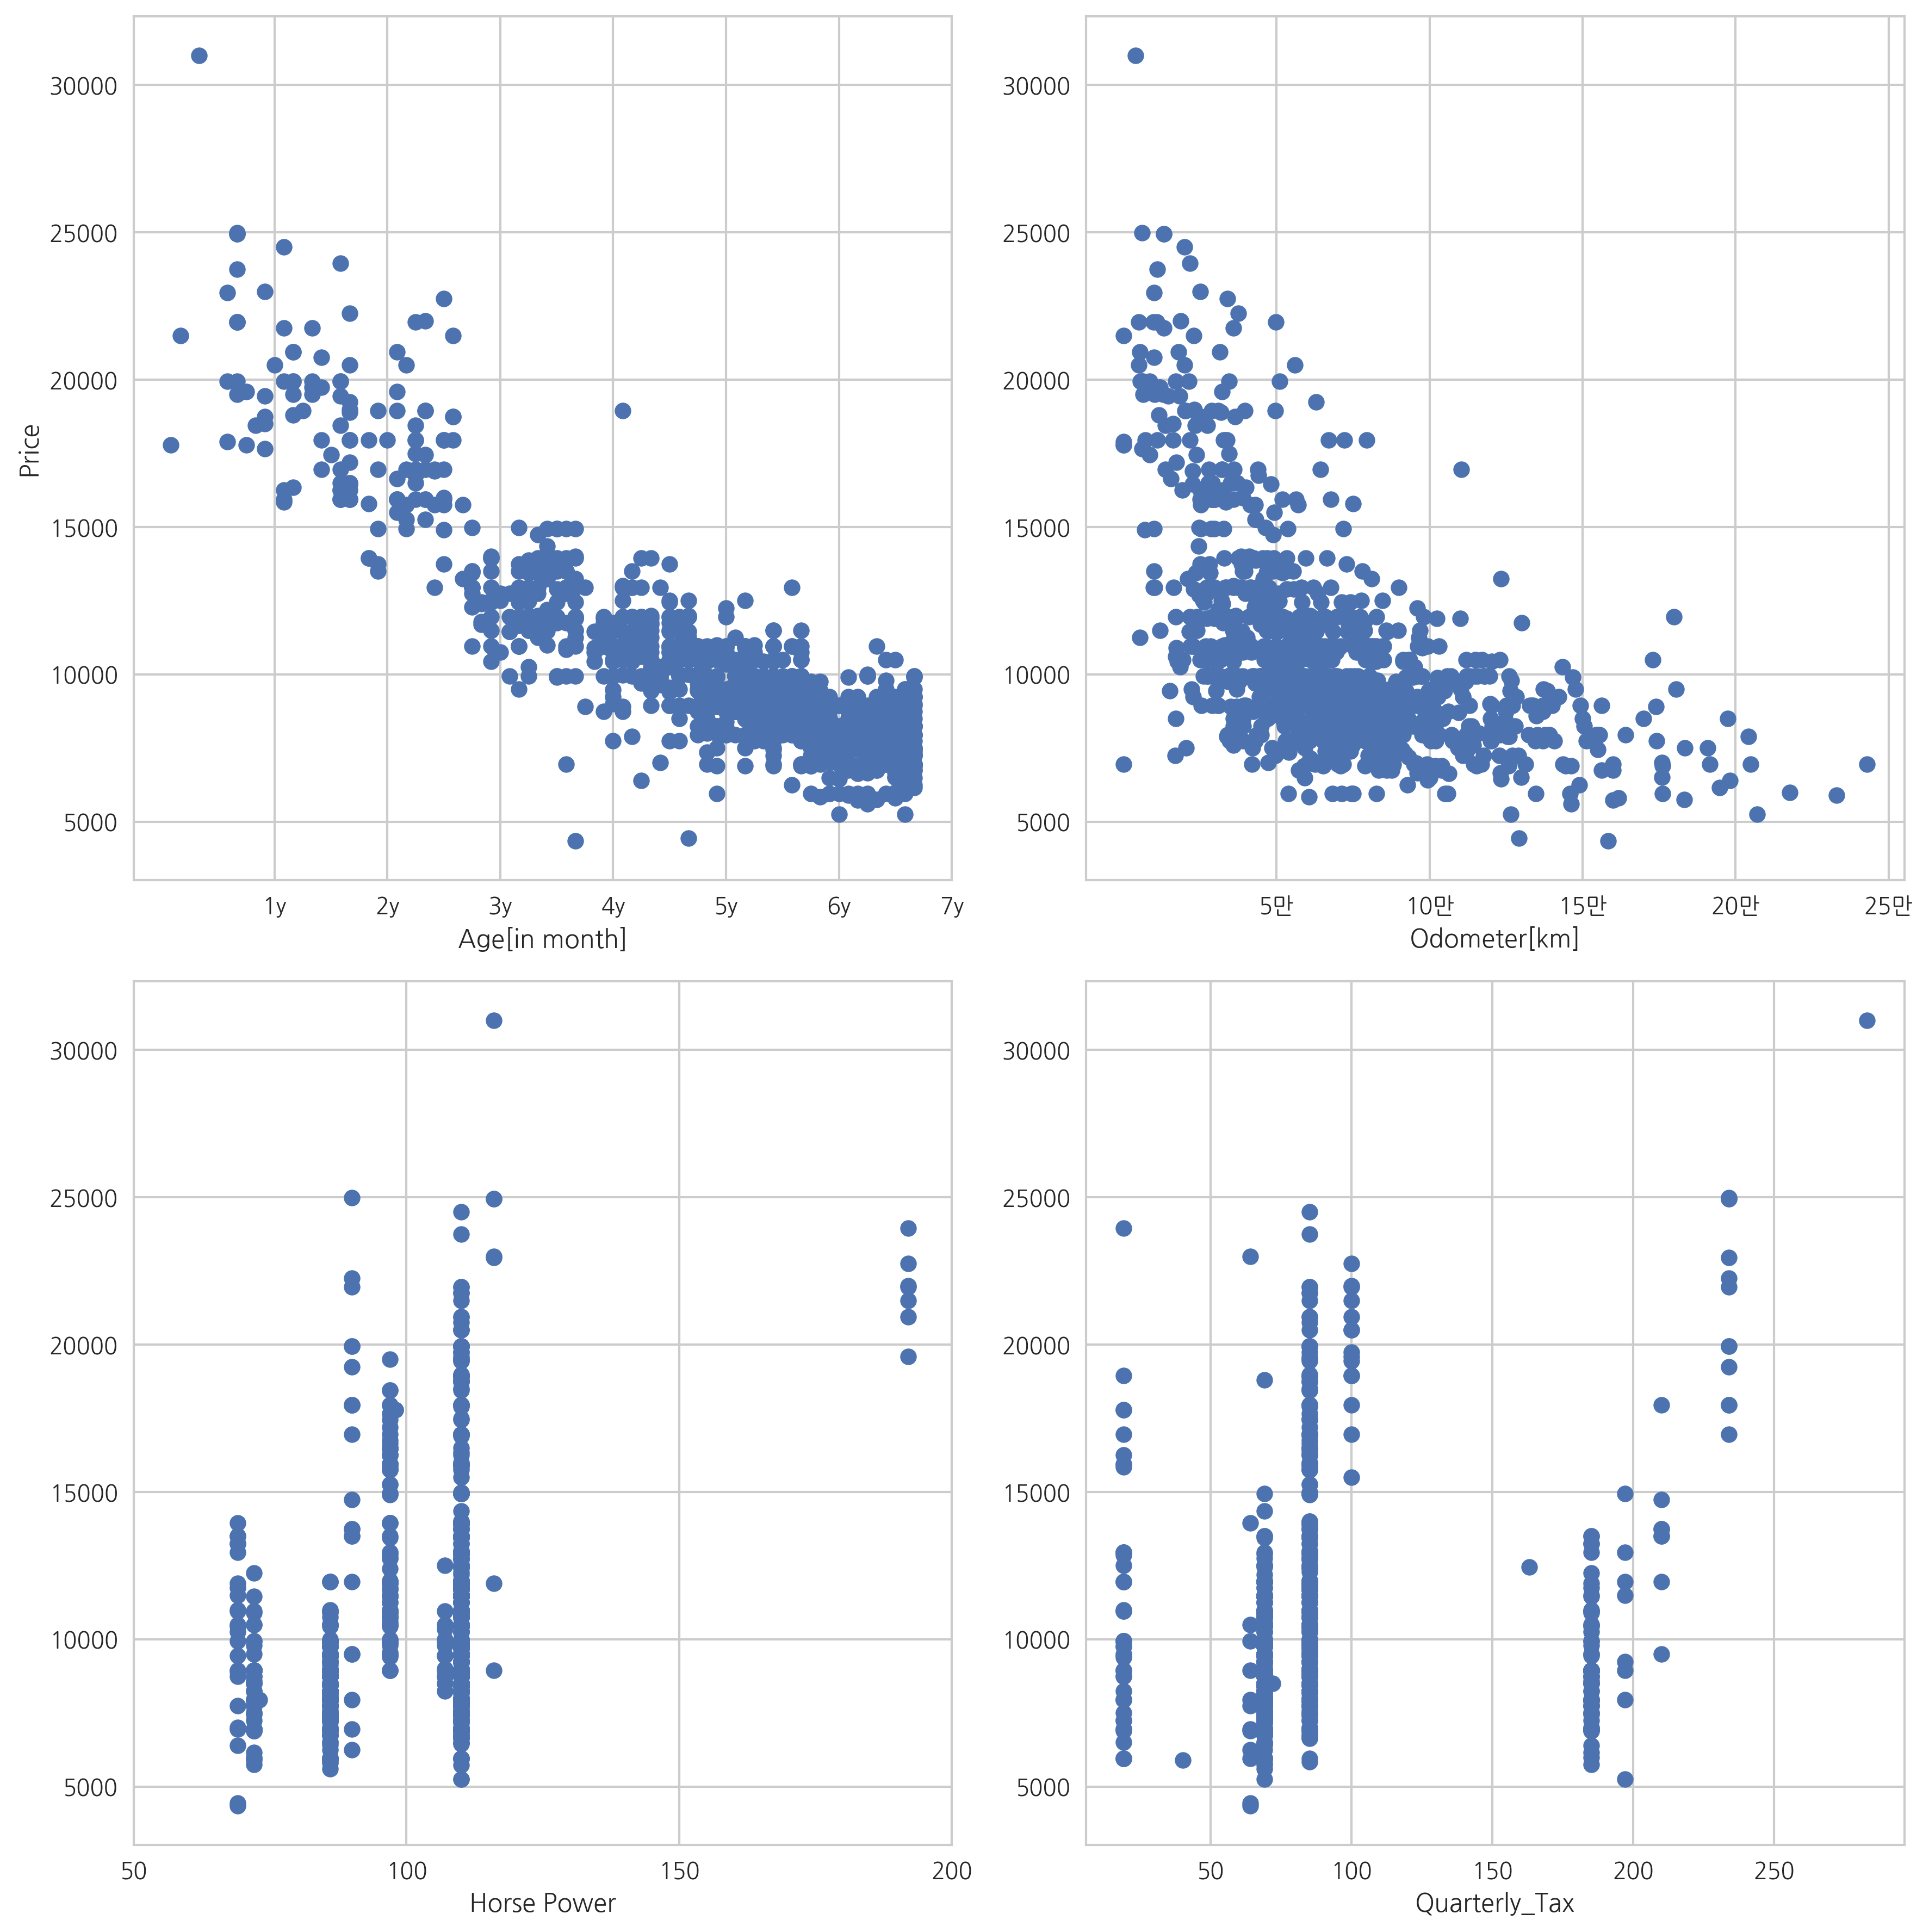

In [59]:
plt.figure(figsize=(12,12))

a_grid = [12, 24, 36, 48, 60, 72, 84]
a_label = ['1y', '2y', '3y', '4y', '5y', '6y', '7y']
plt.subplot(221); plt.scatter(df['Age_08_04'], df['Price']); plt.ylabel('Price'); plt.xlabel('Age[in month]'); \
plt.xticks(a_grid, a_label)

o_grid = [5e4, 1e5, 1.5e5, 2e5, 2.5e5]; o_label = ['5만', '10만', '15만', '20만', '25만']
plt.subplot(222); plt.scatter(df['KM'], df['Price']); plt.xlabel('Odometer[km]'); plt.xticks(o_grid, o_label)

pw_grid = [50, 100, 150, 200]
plt.subplot(223); plt.scatter(df['HP'], df['Price']); plt.xlabel('Horse Power'); plt.xticks(pw_grid)

plt.subplot(224); plt.scatter(df['Quarterly_Tax'], df['Price']); plt.xlabel('Quarterly_Tax'); #plt.xticks(pw_grid)

plt.tight_layout()
plt.show()

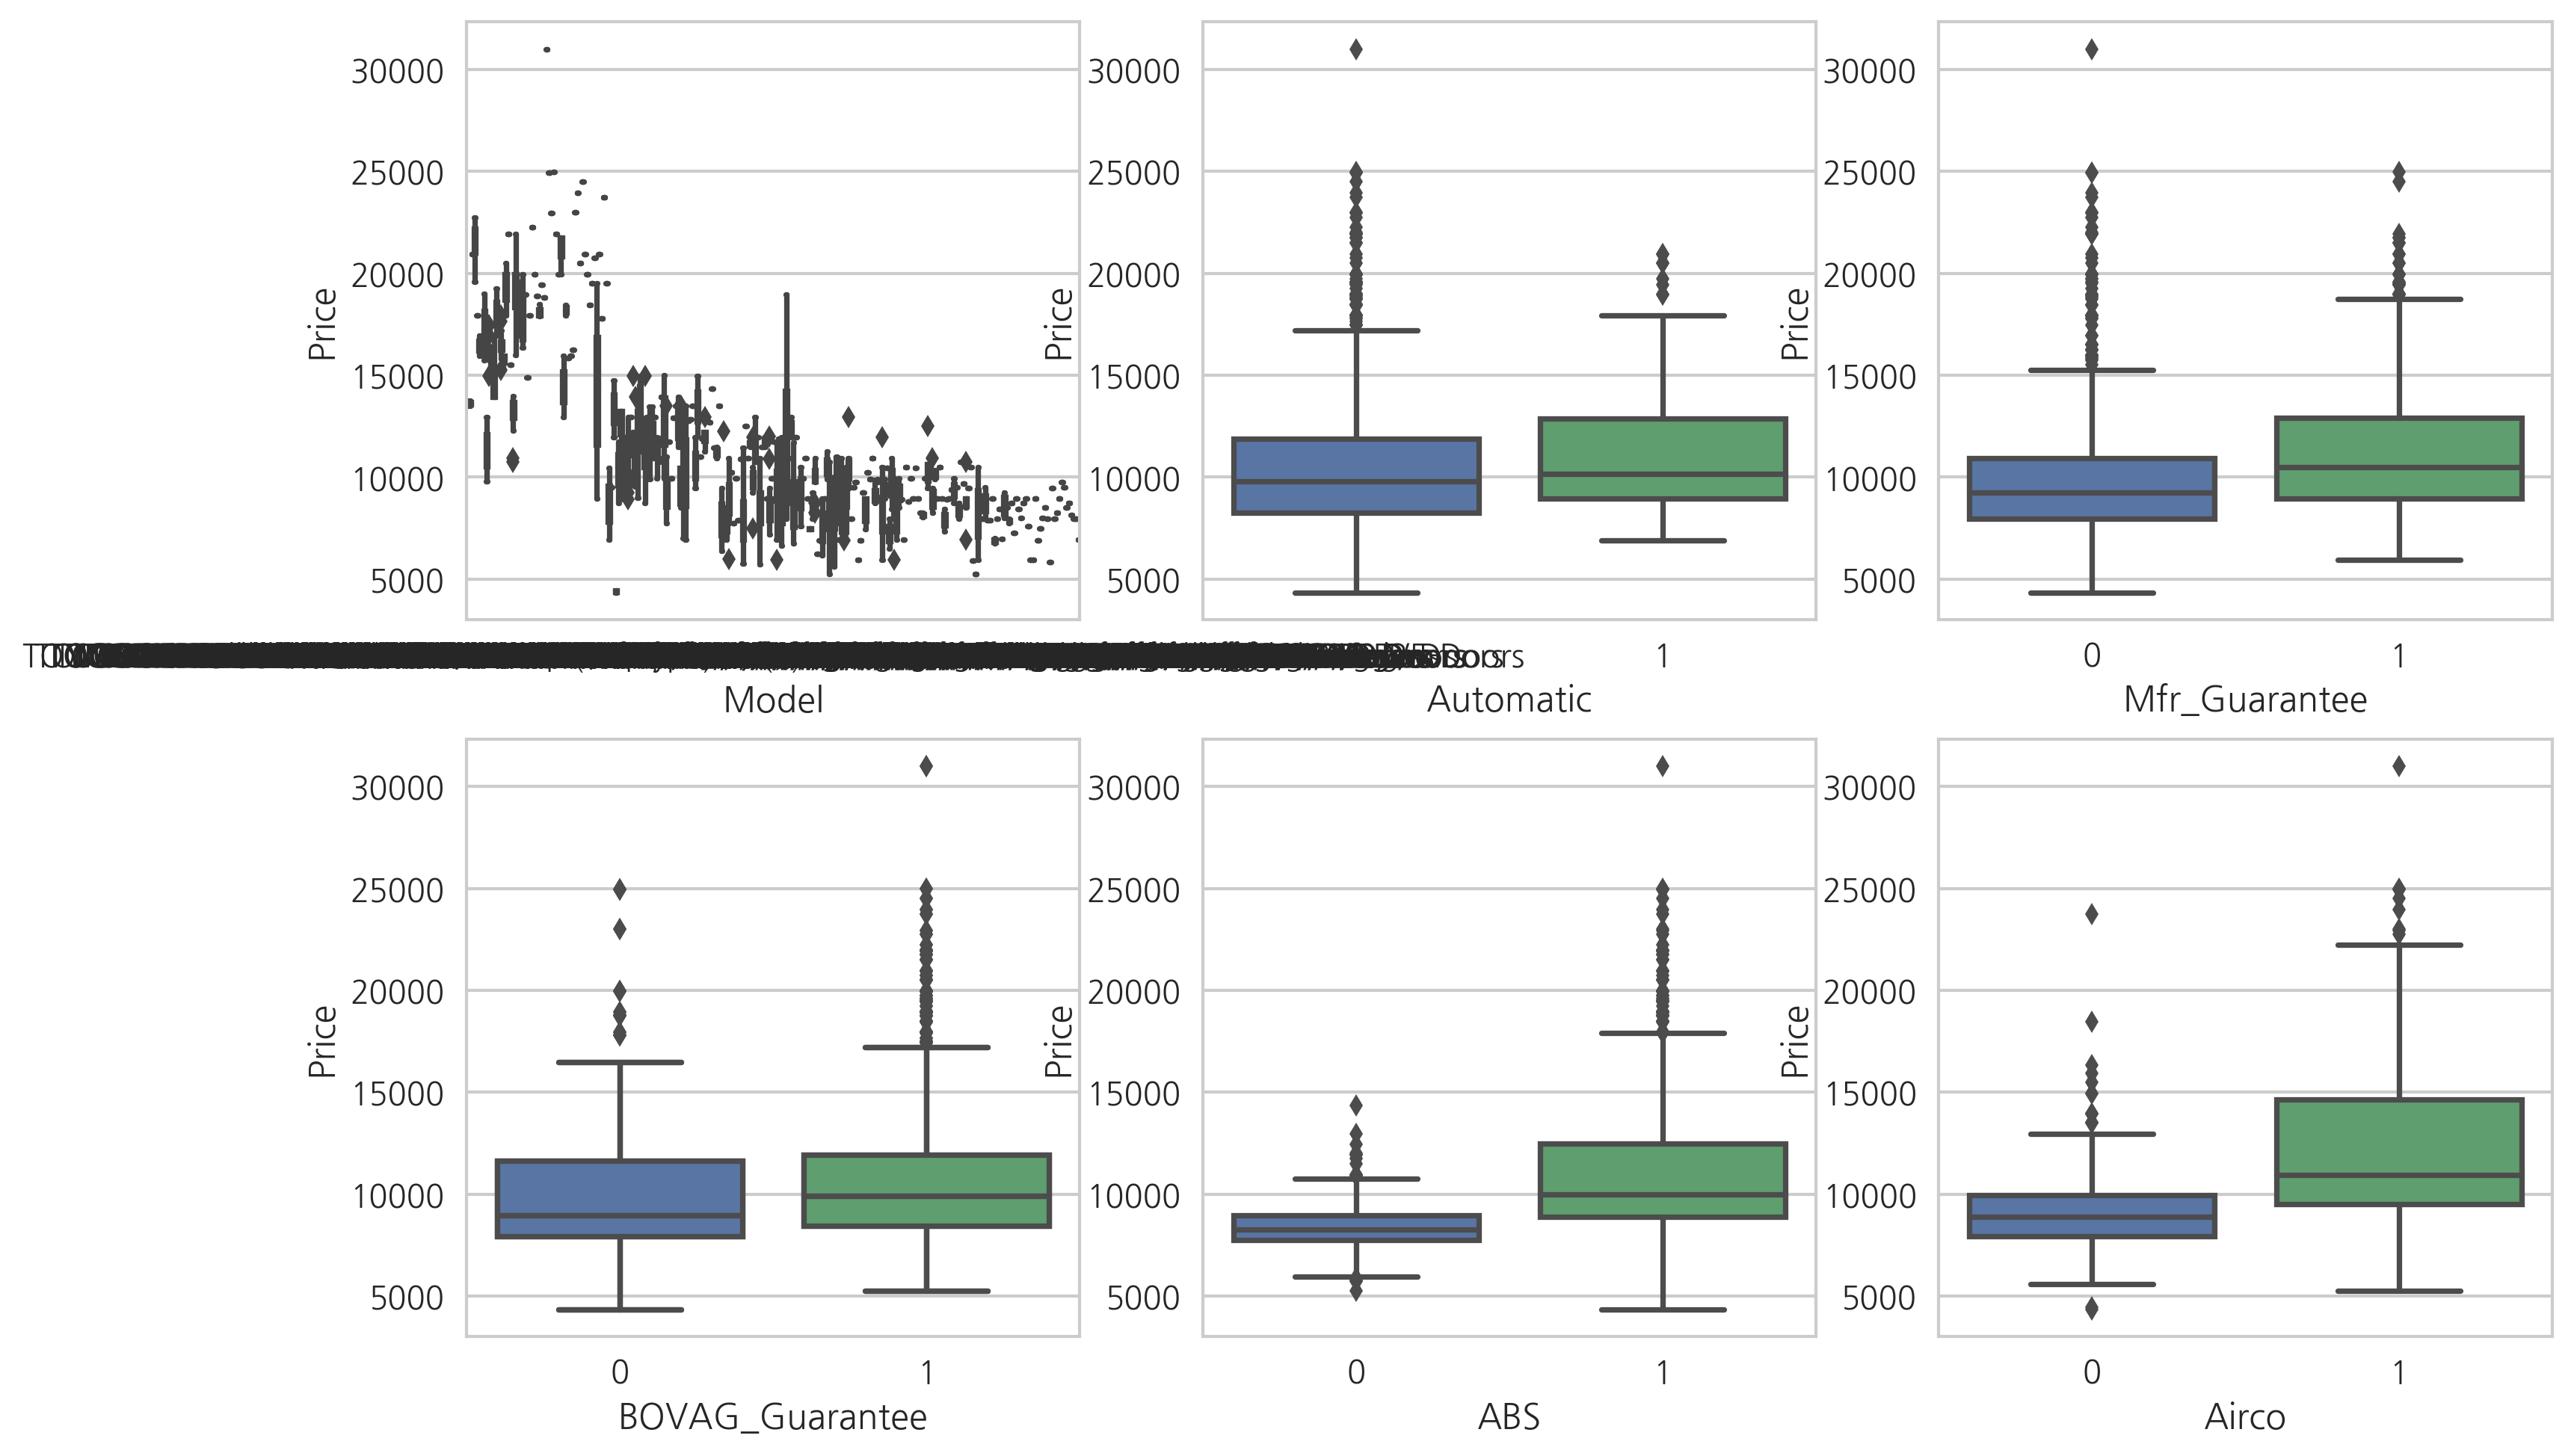

In [154]:
plt.figure(figsize=(12,12))
plt.subplot(331); sns.boxplot(x="Model", y="Price", data=df)
plt.subplot(332); sns.boxplot(x="Automatic", y="Price", data=df)
plt.subplot(333); sns.boxplot(x="Mfr_Guarantee", y="Price", data=df)
plt.subplot(334); sns.boxplot(x="BOVAG_Guarantee", y="Price", data=df)
plt.subplot(334); sns.boxplot(x="BOVAG_Guarantee", y="Price", data=df)
plt.subplot(335); sns.boxplot(x="ABS", y="Price", data=df)
plt.subplot(336); sns.boxplot(x="Airco", y="Price", data=df)



In [ ]:
print(df['Model'].value_counts())

In [ ]:
df[df['Age_08_04'] <= 10]

In [ ]:
df.set_index('Age_08_04', inplace=True)

In [ ]:
Age_group = df.groupby(lambda Age_08_04: Age_08_04 // 10) 

In [ ]:
Age_group.groups()

In [245]:
test = pd.read_csv("test.csv")
df = pd.read_csv("train.csv")
vr_desc = pd.read_excel("data_description.xls")

# 10월 17일(화)

1) 독립변수들 중 이산확률변수(카테고리값)인 변수항목

Model, Mfg_Month, Mfg_Year, Fuel_Type, Met_Color, Color, Automatic, Doors, Cylinders, Gears, Mfr_Guarantee, BOVAG_Guarantee, ABS, Airbag_1, Airbag_2, Airco 이하 모두 이산확률변수 ...

** 이중 문자열로 되어 있어 숫자값으로 바꿔줘야할 변수들은

Model: 굉장히 여러가지 다양한 모델 넘버 존재(그냥 삭제?)

Fuel_type: Diesel, Petrol, Gas

Color: 이것도 여러가지이지만 숫자 넘버링을 할 수는 있을 듯.

2) 독립변수들 중 연속확률변수로 바로 회귀분석에 사용 가능한 변수항목

Age_08_04, KM, HP, CC, Quarterly_Tax, Weight, Guarantee_Period



In [206]:
from sklearn.linear_model import LinearRegression
dfy = df['Price'] # 실제 자동자 가격(Target value) dfy = df.iloc[:, 2] df의 2열을 dfy에 대입을 이렇게 쓸 수도 있음
dfX0 = df.drop('Price', 1) # 회귀분석에 사용할 독립변수들('Price'열만 제거)
dfX0.drop('Id', 1, inplace = True)
print(len(df.columns))

cf_cols = ['Age_08_04', 'KM', 'HP', 'CC', 'Quarterly_Tax', 'Weight', 'Guarantee_Period']
dfXC0 = pd.DataFrame(df, columns=cf_cols)
dfXC0.tail()

39


,Age_08_04,KM,HP,CC,Quarterly_Tax,Weight,Guarantee_Period
1014,71,29000,86,1300,69,1045,3
1015,69,20544,86,1300,69,1025,3
1016,71,17016,86,1300,69,1015,3
1017,70,16916,86,1300,69,1015,3
1018,76,1,110,1600,19,1114,3


[ -1.24682100e+02  -1.95275515e-02   3.26080956e+01  -1.99275116e-02
   4.39363535e+00   1.54228619e+01   3.25335573e+01]
-1261.50051084


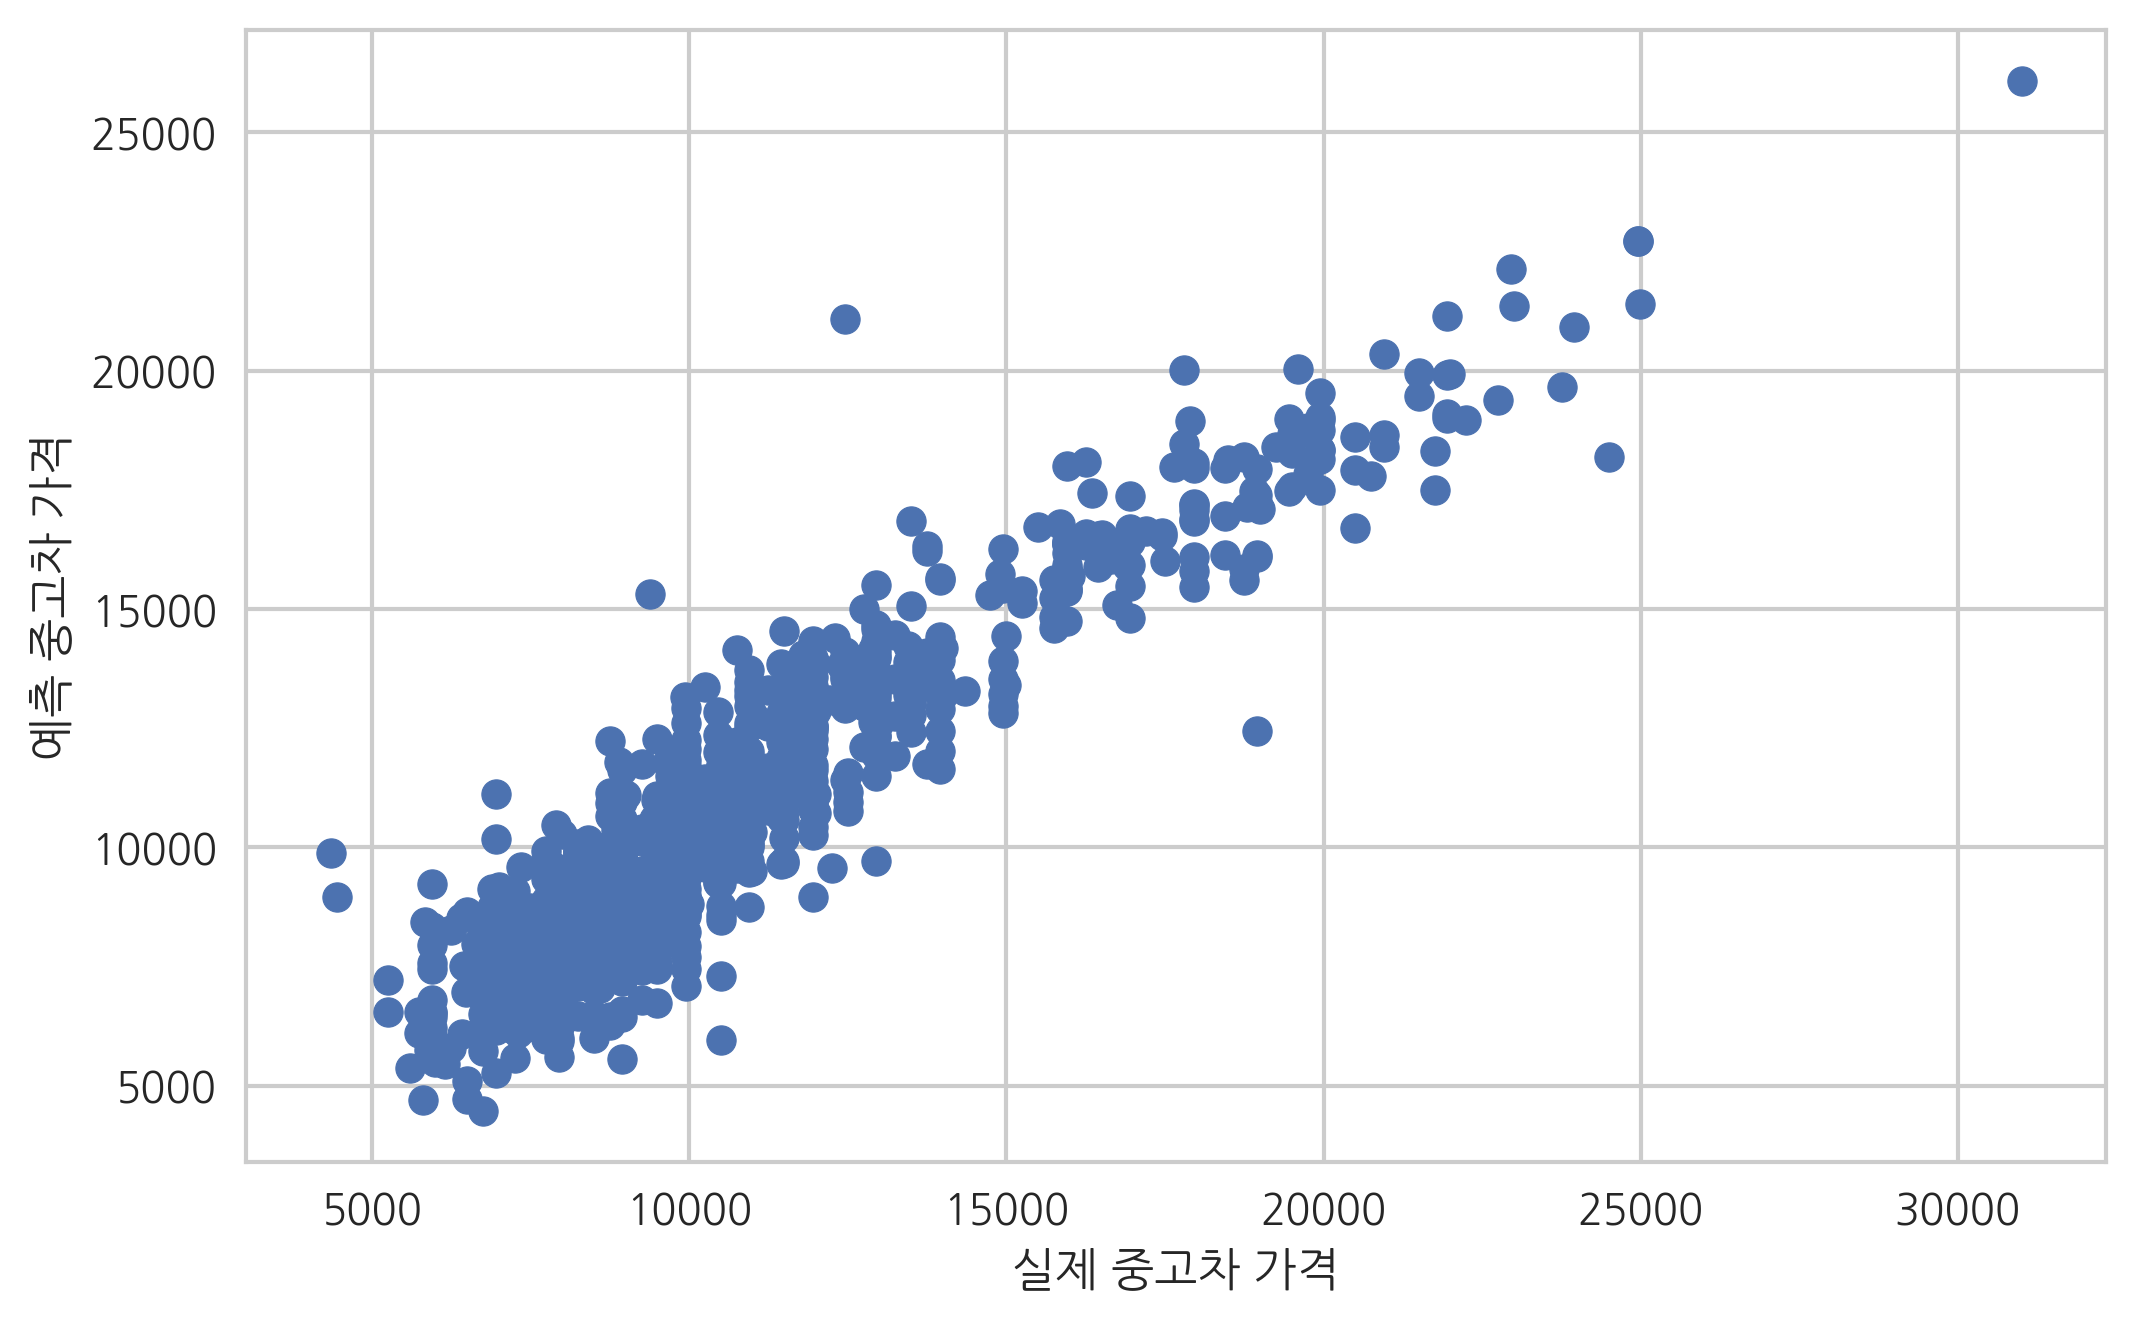

In [180]:
# Scikit-learn으로 연속확률변수만을 가지고 계산한 선형회귀결과
model_corolla = LinearRegression().fit(dfXC0, dfy)
predictions = model_corolla.predict(dfXC0)

print(model_corolla.coef_)
print(model_corolla.intercept_)

plt.scatter(dfy, predictions)
plt.xlabel(u"실제 중고차 가격")
plt.ylabel(u"예측 중고차 가격")
plt.show()

# Data 입력

In [223]:
test = pd.read_csv("test.csv")
df = pd.read_csv("train.csv")
vr_desc = pd.read_excel("data_description.xls")

dfy = df['Price'] # 실제 자동자 가격(Target value) dfy = df.iloc[:, 2] df의 2열을 dfy에 대입을 이렇게 쓸 수도 있음
dfX0 = df.drop('Price', 1) # 회귀분석에 사용할 독립변수들('Price'열만 제거)
dfX0.drop('Id', 1, inplace = True)

# Data 전처리


1. `Model` 전처리

    * 자동차 모델은 각종 사양에 따라 데이터셋 안에 256가지 존재

    * 몇 가지 사양(VVT, HATCHB 등)을 제외하고는 모델 넘버에 명시된 사양의 대부분이 다른 독립변수(CC, Doors 등)에 나타남
    
    * 각 모델에 따라 빈도가 높은 것부터 0부터 255까지 숫자값 부여
    
2. `Fuel Type` 전처리

    * Fuel Type(Petrol, Deisel, CNG)에 따른 변수값 설정

        * Petrol: 0
        
        * Deisel: 1
        
        * CNG: -1
        
3. `Color` 전처리
    * 색상 10가지에 대해 변수값 설정
    
    * 빈도가 높은 색상부터 낮은 색상 순으로 0부터 9까지 숫자값 부여

In [224]:
# Model 변수의 값 종류 탐색
dfX0.groupby('Model').size().sort_values(ascending=False)

Model
TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors           79
TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors           57
TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors             56
TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors            53
TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors           33
TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-Doors            29
TOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-Doors            28
TOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-Doors            26
TOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-Doors              25
TOYOTA Corolla 1.6 16V WAGON LINEA TERRA Stationwagen         22
TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-Doors           20
TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors                19
TOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-Doors            18
TOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-Doors            17
TOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-Doors            15
TOYOTA Corolla 1.6 

In [225]:
# Model 변수 전처리용 함수 정의
model_group = dfX0.groupby('Model').size().sort_values(ascending=False).keys()
def p_pro_model(model):
    for i in range(len(model_group)):
        if model == model_group[i]:
            return i

In [226]:
# 전처리
dfX0['Model'] = dfX0['Model'].apply(p_pro_model)

In [227]:
# 전처리 결과 확인
dfX0.groupby('Model').size().sort_values(ascending=False)

Model
0      79
1      57
2      56
3      53
4      33
5      29
6      28
7      26
8      25
9      22
10     20
11     19
12     18
13     17
14     15
15     15
16     14
17     14
18     14
19     13
20     12
21     11
22     10
23     10
24      8
25      8
28      7
27      7
26      7
29      6
       ..
176     1
189     1
188     1
187     1
186     1
185     1
184     1
183     1
182     1
181     1
180     1
179     1
178     1
177     1
175     1
161     1
174     1
173     1
172     1
171     1
170     1
169     1
168     1
167     1
166     1
165     1
164     1
163     1
162     1
127     1
Length: 256, dtype: int64

In [228]:
# Fuel_Type 변수의 값 종류 탐색
fueltype_group = dfX0.groupby('Fuel_Type')
fueltype_group.size().sort_values(ascending=False)

Fuel_Type
Petrol    904
Diesel    106
CNG         9
dtype: int64

In [229]:
# Fuel_Type 전처리용 함수 정의 및 전처리
def p_pro_fuel(fuel_type):
    if fuel_type == 'Petrol':
        return 0
    elif fuel_type == 'Diesel':
        return 1
    elif fuel_type == 'CNG':
        return -1
    
dfX0['Fuel_Type'] = dfX0['Fuel_Type'].apply(p_pro_fuel)

In [230]:
# 전처리된 Fuel_Type 값 확인
dfX0.groupby('Fuel_Type').size()

Fuel_Type
-1      9
 0    904
 1    106
dtype: int64

In [231]:
# Color 변수의 값 종류 탐색
color_group = dfX0.groupby('Color')
color_group.size().sort_values(ascending=False)

Color
Red       207
Grey      207
Blue      206
Green     149
Black     132
Silver     90
White      21
Beige       3
Yellow      2
Violet      2
dtype: int64

In [232]:
# Color 변수의 전처리용 함수 정의 및 전처리
def p_pro_color(color):
    if color == 'Red':
        return 0
    elif color == 'Grey':
        return 1
    elif color == 'Blue':
        return 2
    elif color == 'Green':
        return 3
    elif color == 'Black':
        return 4
    elif color == 'Silver':
        return 5
    elif color == 'White':
        return 6
    elif color == 'Beige':
        return 7
    elif color == 'Yellow':
        return 8
    elif color == 'Violet':
        return 9
dfX0['Color'] = dfX0['Color'].apply(p_pro_color)

In [233]:
# 전처리된 Color 값 확인
dfX0.groupby('Color').size()

Color
0    207
1    207
2    206
3    149
4    132
5     90
6     21
7      3
8      2
9      2
dtype: int64

In [236]:
dfX0.shape

(1019, 37)

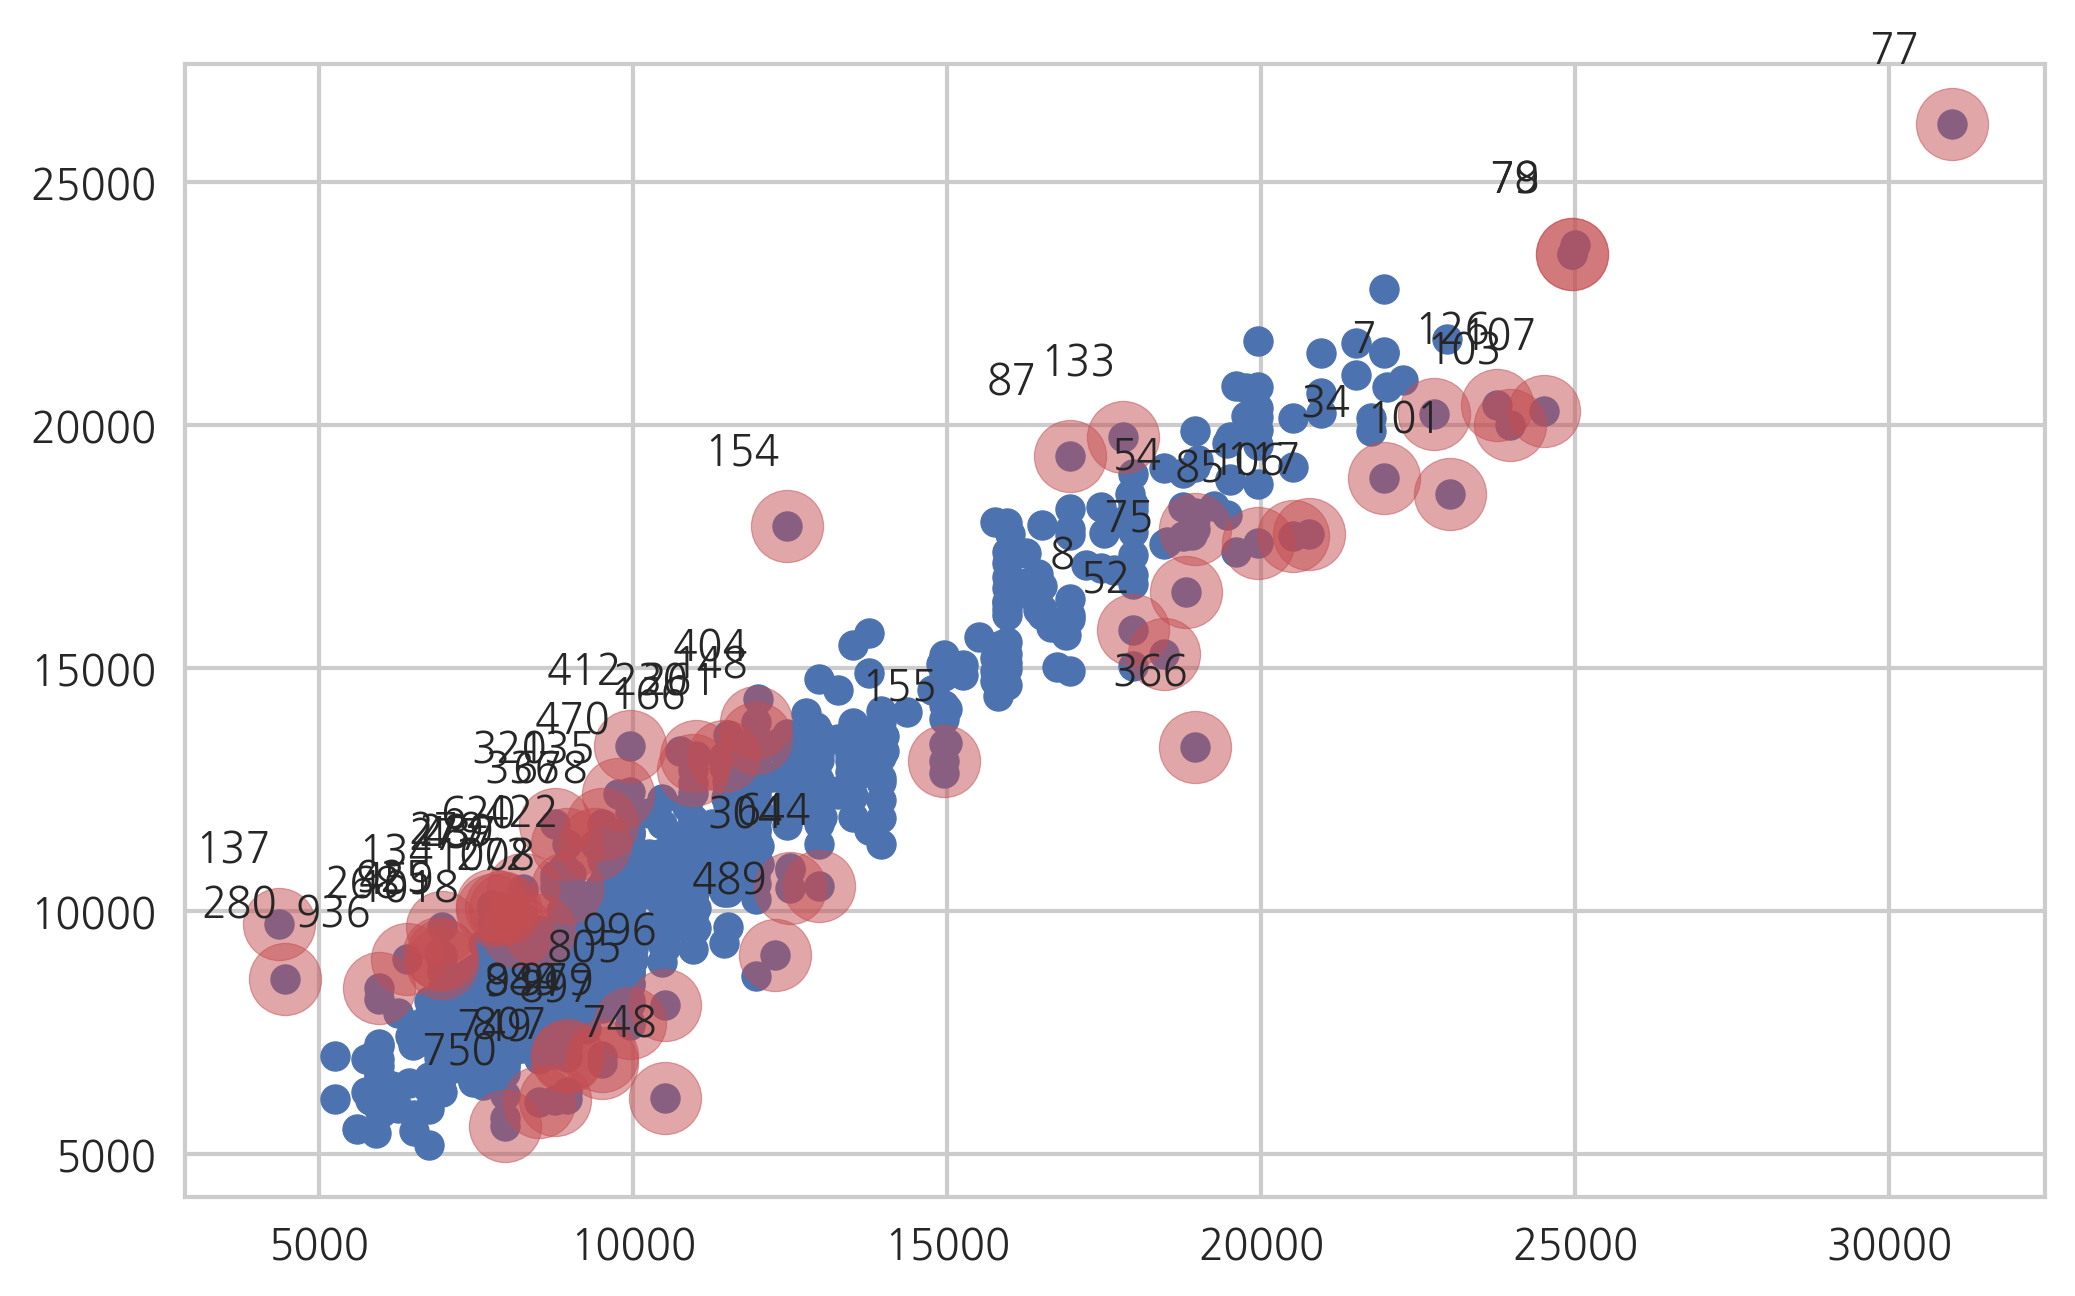

In [243]:
# OLS 회귀분석 첫번 째
dfX = sm.add_constant(dfX0)
model = sm.OLS(dfy, dfX)
result = model.fit()
dfy_new = result.predict(dfX)
influence = result.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(dfy) - 37 -1)
idx = np.where(cooks_d2 > fox_cr)[0]
ax = plt.subplot()
plt.scatter(dfy, dfy_new)
plt.scatter(dfy.values[idx], dfy_new.values[idx], s=300, c='r', alpha=0.5)
from statsmodels.graphics import utils
utils.annotate_axes(range(len(idx)), idx, list(zip(dfy.values[idx].flatten(), dfy_new.values[idx].flatten())), 
                    [(-20, 15)] * len(idx), size="small", ax=ax)
plt.show()

In [244]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     275.3
Date:                Tue, 17 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:10:48   Log-Likelihood:                -8581.5
No. Observations:                1019   AIC:                         1.723e+04
Df Residuals:                     983   BIC:                         1.741e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Model                 0.2034      0.86